In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
lr_coef = pd.read_csv('https://www.dropbox.com/s/l0tkopj52khiwg4/lr_coef.csv?dl=1')
lr_coef = lr_coef.drop(columns = 'Unnamed: 0')

In [5]:
len(lr_coef)

13528

In [6]:
lr_coef

,features,f_coef
0,abandoned,0.010164
1,ability,0.021073
2,ability to,0.024023
3,able,0.001355
4,able to,0.028770
...,...,...
13523,yrs,-0.105696
13524,zero,0.020231
13525,zoloft,-0.023103
13526,zombie,0.019130


In [7]:
lr_coef_s = lr_coef[lr_coef['f_coef']>0]
lr_coef_d = lr_coef[lr_coef['f_coef']<0]

In [8]:
top20_s = lr_coef_s.sort_values(by='f_coef',ascending=True)[-30:]

In [9]:
top20_d = lr_coef_d.sort_values(by='f_coef',ascending=True)[:30]

In [10]:
top_40 = pd.concat([top20_d,top20_s])

In [11]:
top_40

,features,f_coef
4913,hi,-0.511334
134,advice,-0.243043
5287,im new,-0.238195
4798,hello,-0.216911
13411,years,-0.208217
8629,partner,-0.197482
2116,cant get,-0.194151
7767,new here,-0.192372
7568,my partner,-0.181047
1103,around me,-0.177336


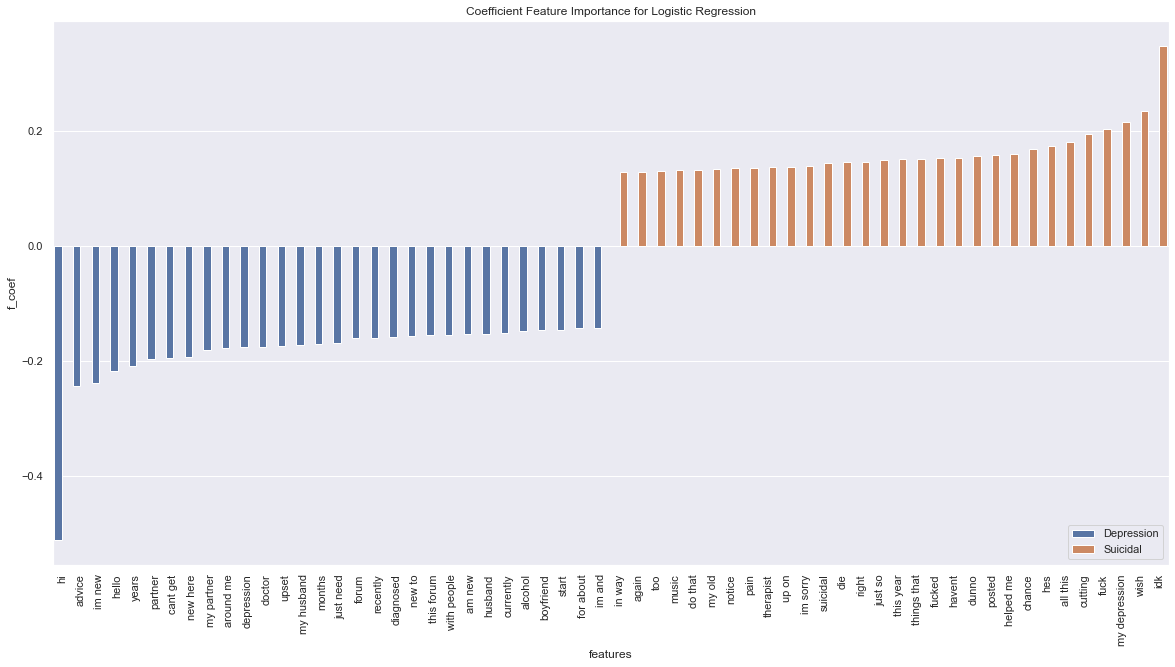

In [13]:
sns.set(rc={'figure.figsize':(20,10)})
colors = ['Suicidal' if c >= 0 else 'Depression' for c in top_40['f_coef']]
g = sns.barplot(
    x=top_40['features'],
    y=top_40['f_coef'],
    hue=colors,
    palette=sns.color_palette() 
)
plt.xticks(rotation=90)
plt.title('Coefficient Feature Importance for Logistic Regression')
plt.show()